In [51]:
import numpy as np
from numpy import mean
from numpy import std
from numpy import absolute
from numpy import arange
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lars


In [2]:
df_boston = pd.read_csv('e:/programming/samples/boston.csv')
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df_boston.shape

(506, 14)

In [4]:
df_boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

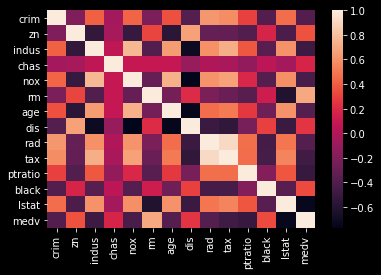

In [53]:
sns.heatmap(df_boston.corr())

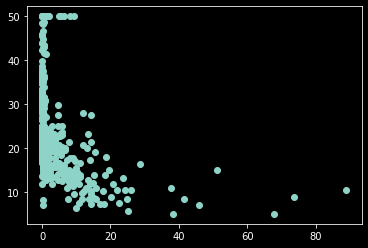

In [55]:
plt.scatter(df_boston.crim, df_boston.medv)

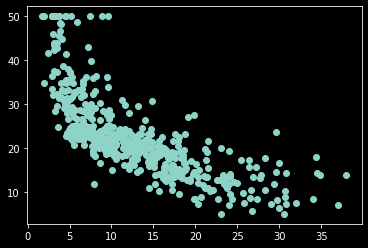

In [56]:
plt.scatter(df_boston.lstat, df_boston.medv)

In [15]:
data_boston = df_boston.values
X, y = data_boston[:, :-1], data_boston[:, -1]
model_boston_lr = Lars()
lr = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_lr = cross_val_score(model_boston_lr, X, y, scoring='neg_mean_absolute_error', cv=lr, n_jobs=-1)
scores_lr = absolute(scores_lr)
print('Mean_lr MAE: %.3f (%.3f)' % (mean(scores_lr), std(scores_lr)))


Mean_lr MAE: 3.432 (0.552)


In [7]:
from sklearn.linear_model import LassoLars
model_boston_ll = LassoLars()
ll = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_ll = cross_val_score(model_boston_ll, X, y, scoring='neg_mean_absolute_error', cv=ll, n_jobs=-1)
scores_ll = absolute(scores_ll)
print('Mean_ll MAE: %.3f (%.3f)' % (10-mean(scores_ll), std(scores_ll)))


Mean_ll MAE: 3.340 (0.706)


In [8]:
from sklearn.linear_model import LarsCV
model_boston_lcv = LarsCV()
lcv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_lcv = cross_val_score(model_boston_lcv, X, y, scoring='neg_mean_absolute_error', cv=lcv, n_jobs=-1)
scores_lcv = absolute(scores_lcv)
print('Mean_lcv MAE: %.3f (%.3f)' % (mean(scores_lcv), std(scores_lcv)))

Mean_lcv MAE: 3.423 (0.544)


In [18]:
from catboost import CatBoostRegressor
model_boston_cbr = CatBoostRegressor()
cbr = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#scores_xgb = cross_val_score(estimator = Lars, X, y, scoring='neg_mean_absolute_error', cbr=cbr, n_jobs=-1)
scores_cbr = cross_val_score(model_boston_cbr, X, y, scoring='neg_mean_absolute_error', cv=cbr, n_jobs=-1)
scores_cbr = absolute(scores_cbr)
print('Mean_cbr MAE: %.3f (%.3f)' % (mean(scores_cbr), std(scores_cbr)))

Mean_cbr MAE: 1.950 (0.350)


In [ ]:
# по результатам среднего MAE можно принять решение по использованию Lars или другой регресии (испытания можно продолжать)

In [58]:
model_boston_lr.fit(X, y)
new_home = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
new_home_prediction_lr = model_boston_lr.predict([new_home])
print(f'New home: %.3f' % new_home_prediction_lr)

New home: 29.904


In [59]:
model_boston_cbr.fit(X, y)
new_home = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
new_home_prediction_cbr = model_boston_cbr.predict([new_home])
print(f'New home: %.3f' % new_home_prediction_cbr)

3.09s	remaining: 1.94s
615:	learn: 0.9988477	total: 3.1s	remaining: 1.93s
616:	learn: 0.9972374	total: 3.1s	remaining: 1.92s
617:	learn: 0.9956889	total: 3.1s	remaining: 1.92s
618:	learn: 0.9943252	total: 3.11s	remaining: 1.91s
619:	learn: 0.9926401	total: 3.11s	remaining: 1.91s
620:	learn: 0.9920020	total: 3.12s	remaining: 1.9s
621:	learn: 0.9907267	total: 3.12s	remaining: 1.9s
622:	learn: 0.9888085	total: 3.13s	remaining: 1.89s
623:	learn: 0.9877936	total: 3.13s	remaining: 1.89s
624:	learn: 0.9856598	total: 3.13s	remaining: 1.88s
625:	learn: 0.9840003	total: 3.14s	remaining: 1.88s
626:	learn: 0.9825492	total: 3.14s	remaining: 1.87s
627:	learn: 0.9813905	total: 3.15s	remaining: 1.86s
628:	learn: 0.9809829	total: 3.15s	remaining: 1.86s
629:	learn: 0.9794177	total: 3.16s	remaining: 1.85s
630:	learn: 0.9781286	total: 3.16s	remaining: 1.85s
631:	learn: 0.9763960	total: 3.17s	remaining: 1.84s
632:	learn: 0.9749310	total: 3.17s	remaining: 1.84s
633:	learn: 0.9731869	total: 3.17s	remaining: 

In [60]:
model_boston_ll.fit(X, y)
new_home = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
new_home_prediction_ll = model_boston_ll.predict([new_home])
print(f'New home: %.3f' % new_home_prediction_ll)

New home: 22.533


In [63]:
model_boston_lcv.fit(X, y)
new_home = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
new_home_prediction_lcv = model_boston_lcv.predict([new_home])
print(f'New home: %.3f' % new_home_prediction_lcv)

New home: 30.656


In [64]:
mean_home = mean([new_home_prediction_lcv, new_home_prediction_ll, new_home_prediction_cbr, new_home_prediction_lr])
mean_home

26.814401543846305

In [68]:
import shap
shap.initjs()

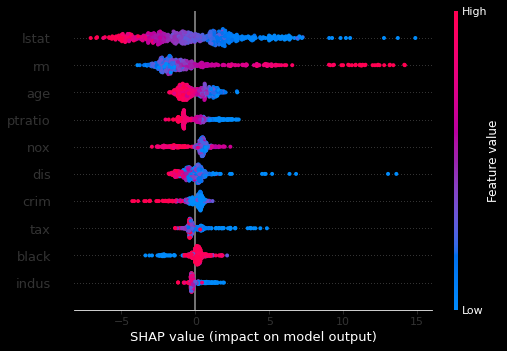

In [102]:
shap_test = shap.TreeExplainer(model_boston_cbr).shap_values(df_boston)
shap.summary_plot(shap_test, df_boston, max_display=10, auto_size_plot=True)